<a href="https://colab.research.google.com/github/farhanjafri25/TSF-Tasks/blob/master/Task%20-%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4 - To Explore Decision Tree Algorithm on Iris Dataset**

**Mohd Farhan Jafri**

In [57]:
#importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [58]:
#Loading The Datasets
balance_data = pd.read_csv('Iris.csv')
balance_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
print('Dataset length :: ', len(balance_data))

Dataset length ::  150


In [60]:
print('Dataset shape:: ', balance_data.shape)

Dataset shape::  (150, 6)


In [61]:
balance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [62]:
#changing the target variable from Categorial to Numerical
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
label = l.fit_transform(balance_data['Species'])

In [63]:
#Dropping the Unuseful columns
df = balance_data.drop(['Species', 'Id'], axis = 'columns')

In [64]:
df['Species'] = label
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**Visualing the Data**

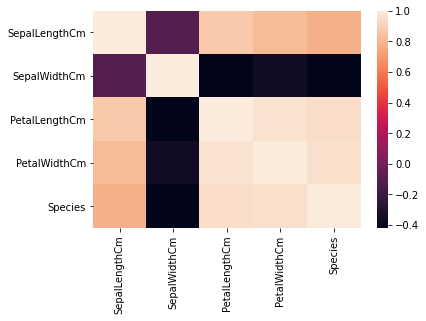

In [65]:
sns.heatmap(df.corr())

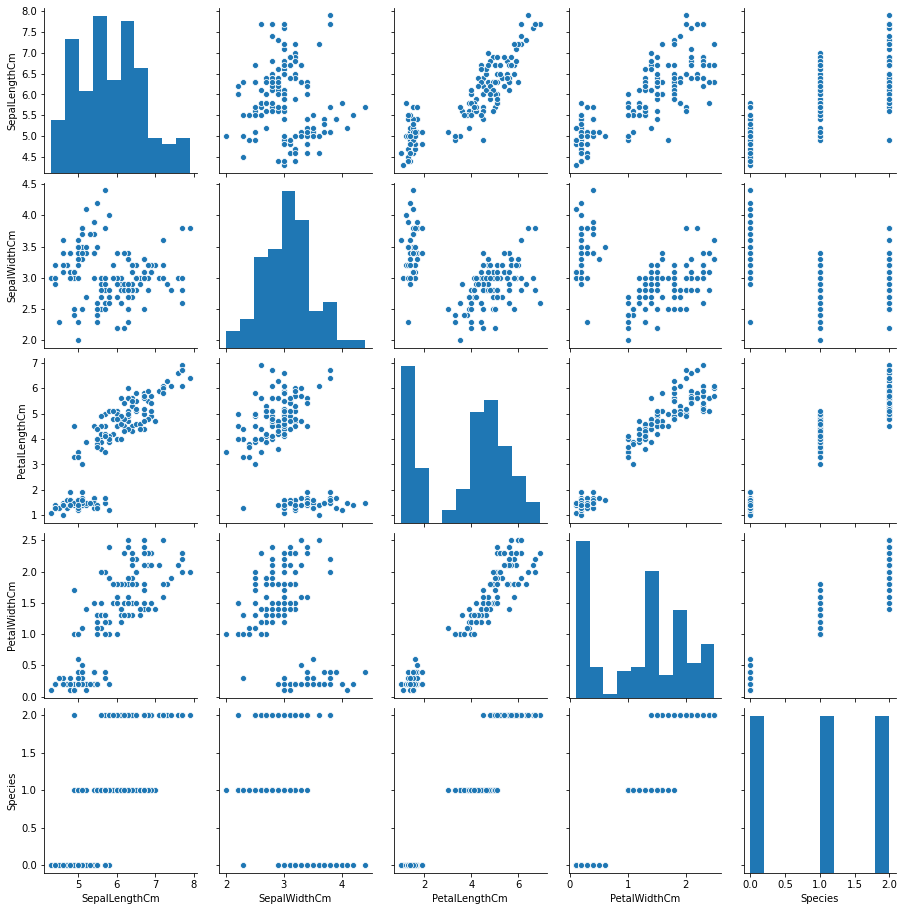

In [66]:
sns.pairplot(df)

**Splitting and Storing the Model into seperate variable**

In [67]:
X = df.iloc[: , :-1].values
y = df.iloc[: , -1]


In [68]:
X.shape , y.shape

((150, 4), (150,))

In [69]:
#training and testing the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.33, random_state= 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 4)
(100,)
(50, 4)
(50,)


**Decision Tree Classifier Model:-**

In [70]:
#importing the model and data fitting
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [71]:
#prediction of test dataset
y_pred = clf.predict(X_test)

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.95      0.95      0.95        19
           2       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



The model is 96% accurate. We can use any data to get desireable outputs.

**Visualize the Decision Tree:-**

In [73]:
Feature_names = list(df.columns[1:])

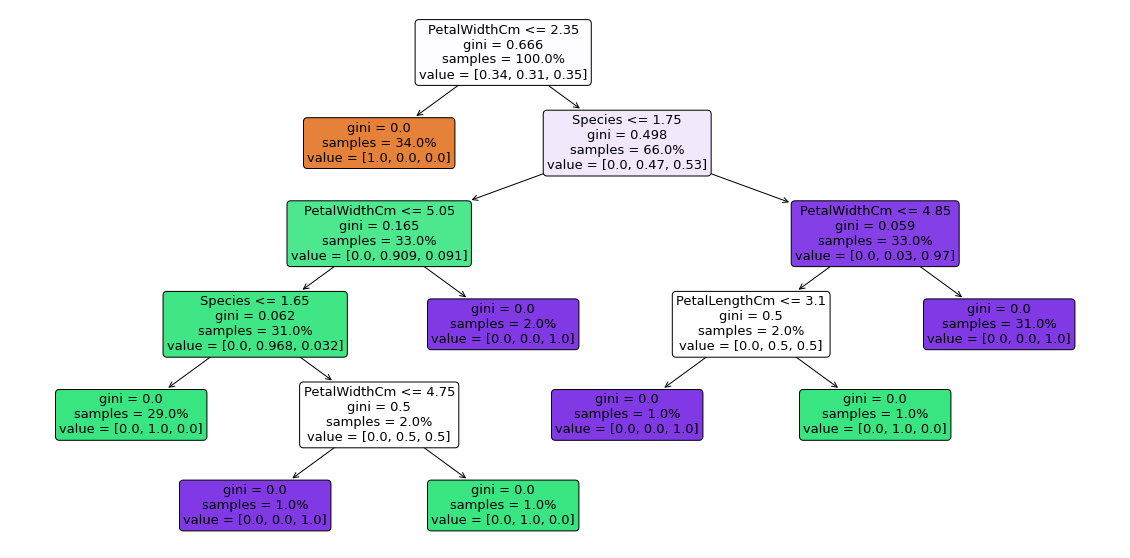

In [74]:
from sklearn import tree
Tree = plt.figure(figsize= (20,10))
Tree = tree.plot_tree(clf, feature_names= Feature_names , fontsize= 13, filled= 'True' , proportion= True, rounded= 10)
plt.show()

**The decision tree is shown. You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.**